<a href="https://colab.research.google.com/github/jhlee508/handson-ml2-study/blob/master/HoM_Ch12_custom_models_and_training_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

In [64]:
tf.__version__

'2.4.1'

### 2 넘파이처럼 텐서플로 사용하기

#### 2.1 텐서와 연산

In [65]:
# 행렬
tf.constant([[1., 2., 3.], [4., 5., 6.]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [66]:
# 스칼라
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [67]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

In [68]:
t.shape, t.dtype

(TensorShape([2, 3]), tf.float32)

In [69]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [70]:
t[:, 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [71]:
# t + 10 와 같은 표현
tf.add(t, 10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [72]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [73]:
tf.multiply(t, 2)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [74]:
# 케라스의 저수준 API
K = keras.backend
K.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

#### 2.2 텐서와 넘파이

In [75]:
a = np.array([2., 4., 5.])

In [76]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [77]:
t.numpy() # np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [78]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [79]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

#### 2.3 타입 변환

In [80]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [81]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [82]:
# tf.cast() 함수 사용
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

#### 2.4 변수(variable)

In [83]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [84]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [85]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [86]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [87]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

#### 2.5 다른 데이터 구조

##### Sparse Tensor

In [88]:
st1 = tf.SparseTensor(indices=[[0, 3], [2, 4]],
                      values=[10, 20],
                      dense_shape=[3, 10])
print(st1)

SparseTensor(indices=tf.Tensor(
[[0 3]
 [2 4]], shape=(2, 2), dtype=int64), values=tf.Tensor([10 20], shape=(2,), dtype=int32), dense_shape=tf.Tensor([ 3 10], shape=(2,), dtype=int64))


In [89]:
tf.sparse.to_dense(st1)

<tf.Tensor: shape=(3, 10), dtype=int32, numpy=
array([[ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0]], dtype=int32)>

##### Tensor Array

In [90]:
ta = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True, clear_after_read=False) # 동적으로 리스트 길이 설정
ta = ta.write(0, tf.constant([1., 2.]))
ta = ta.write(1, tf.constant([3., 10.]))
ta = ta.write(2, tf.constant([5., 7.]))

In [91]:
ta.read(0)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [92]:
ta.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [93]:
ta.read(2)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([5., 7.], dtype=float32)>

In [94]:
ta.stack(0)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3., 10.],
       [ 5.,  7.]], dtype=float32)>

##### Ragged Tensor

In [95]:
digits = tf.ragged.constant([[3, 1, 4, 1], [], [5, 9, 2], [6], []])
words = tf.ragged.constant([["So", "long"], ["thanks", "for", "all", "the", "fish"]])

print(tf.add(digits, 3))
print(tf.reduce_mean(digits, axis=1))
print(tf.concat([digits, [[5, 3]]], axis=0))
print(tf.tile(digits, [1, 2]))
print(tf.strings.substr(words, 0, 2))

<tf.RaggedTensor [[6, 4, 7, 4], [], [8, 12, 5], [9], []]>
tf.Tensor([2.25              nan 5.33333333 6.                nan], shape=(5,), dtype=float64)
<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], [], [5, 3]]>
<tf.RaggedTensor [[3, 1, 4, 1, 3, 1, 4, 1], [], [5, 9, 2, 5, 9, 2], [6, 6], []]>
<tf.RaggedTensor [[b'So', b'lo'], [b'th', b'fo', b'al', b'th', b'fi']]>


##### String Array(텐서)

In [96]:
# 바이트 문자열
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [97]:
# 자동으로 UTF-8로 인코딩
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [98]:
# 유니코드 문자열
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [99]:
# 바이트 문자열로 인코딩
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [100]:
# 디코딩
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

##### set(집합)

In [101]:
set1 = tf.constant([[2, 4, 5, 7]])
set2 = tf.constant([[4, 5, 6]])

In [102]:
# 합집합
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[2, 4, 5, 6, 7]], dtype=int32)>

In [103]:
# 여집합
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[2, 7]], dtype=int32)>

In [104]:
# 교집합
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[4, 5]], dtype=int32)>

### 3 사용자 정의 모델과 훈련 알고리즘

In [105]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

#### 3.1 사용자 정의 손실 함수

In [106]:
# 후버 손실 함수
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5

    return tf.where(is_small_error, squared_loss, linear_loss)

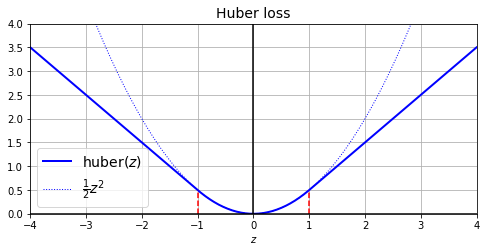

In [107]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [108]:
# 예시 huber 손실함수 모델
huber_loss_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=(784,)),
    keras.layers.Dense(1),
])

huber_loss_model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

#### 3.2 사용자 정의 요소를 가진 모델을 저장하고 로드하기

In [109]:
# 사용자 정의 요소를 가진 모델 저장하기
huber_loss_model.save("1st_model_with_a_custom_loss.h5")

In [110]:
# 사용자 정의 요소를 가진 모델 로드하기
huber_loss_model = keras.models.load_model("1st_model_with_a_custom_loss.h5",
                                       custom_objects={"huber_fn":huber_loss_model})

In [111]:
# 매개변수를 받을 수 있는 함수
def create_huber(threshold=1.0):
    # 후버 손실 함수
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = tf.abs(error) - (threshold**2 / 2)

        return tf.where(is_small_error, squared_loss, linear_loss)

    return huber_fn

In [112]:
huber_loss_model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [113]:
# 사용자 정의 요소를 가진 모델 저장하기
huber_loss_model.save("2nd_model_with_a_custom_loss.h5")

In [114]:
# 사용자 정의 요소를 가진 모델 로드하기
huber_loss_model = keras.models.load_model("2nd_model_with_a_custom_loss.h5",
                                       custom_objects={"huber_fn":create_huber(2.0)})

In [115]:
# threshold 값 소실 문제 해결 -> keras.losses.Loss 상속 함수
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [116]:
# 예시 huber 손실함수 모델
huber_loss_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=(784,)),
    keras.layers.Dense(1),
])

huber_loss_model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [117]:
huber_loss_model.save("3rd_model_with_a_custom_loss_class.h5")

In [118]:
huber_loss_model = keras.models.load_model("3rd_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

In [119]:
huber_loss_model.loss.threshold

2.0

#### 3.3 활성화 함수, 초기화, 규제, 제한 커스터마이징하기

In [120]:
def my_softplus(z): # tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [121]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [122]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [123]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=MyL1Regularizer(0.02),
                           kernel_constraint=my_positive_weights)

#### 3.4 사용자 정의 지표

In [124]:
huber_loss_model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [125]:
# 전체 정밀도 기록 및 측정(스트리밍 지표)
precision = keras.metrics.Precision()

In [126]:
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [127]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [128]:
# 현재 지표 값
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [129]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [130]:
# 초기화
precision.reset_states()

In [131]:
# 스트리밍 지표 생성 함수
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # 기본 매개변수 처리 (예, dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [132]:
input_shape=X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [133]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [134]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.6372 - huber_metric: 0.6372
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1972 - huber_metric: 0.1972


In [135]:
model.save("4th_model_with_a_custom_metric.h5")

In [136]:
model = keras.models.load_model("4th_model_with_a_custom_metric.h5",
                                custom_objects={"huber_fn": create_huber(2.0),
                                                "HuberMetric": HuberMetric})

In [137]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1851 - huber_metric: 0.1851
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1789 - huber_metric: 0.1789


In [138]:
model.metrics[-1].threshold

2.0

#### 3.5 사용자 정의 층

In [139]:
# 입력에 지수함수를 적용하는 층(가중치가 없는 층)
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [140]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [141]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer # 활성화 함수로 사용
])

model.compile(loss="mse", optimizer="sgd")

model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))

print("test loss :", model.evaluate(X_test_scaled, y_test))

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 6.9879 - val_loss: 5.4534
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 5.7174 - val_loss: 5.4518
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 5.7262 - val_loss: 5.4468
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 5.6747 - val_loss: 5.4322
Epoch 5/5
162/162 [==============================] - 0s 791us/step - loss: 5.4705
test loss : 5.470494747161865


In [142]:
# 가중치를 가진 층(Dense 층의 간소화 버전)
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # 마지막에 호출

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [143]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [144]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
print("test loss :", model.evaluate(X_test_scaled, y_test))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 3.4641 - val_loss: 0.7821
Epoch 2/2
162/162 [==============================] - 0s 822us/step - loss: 0.5035
test loss : 0.5034766793251038


In [145]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [146]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

In [147]:
# 훈련과 테스트에서 다르게 동작하는 층(ex. Dropout, BN)
class MyGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

#### 3.6 사용자 정의 모델

In [148]:
# 잔차 블록
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [149]:
# 서브클래싱 API 모델
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [150]:
model = ResidualRegressor(1) # 1은 output_dim

model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
print("test loss :", model.evaluate(X_test_scaled, y_test))

Epoch 1/5
363/363 [==============================] - 2s 2ms/step - loss: 90.4303
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 6.9179
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 1.4344
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 1.0588
Epoch 5/5
162/162 [==============================] - 0s 994us/step - loss: 1.3946
test loss : 1.3945640325546265


In [151]:
# 시퀀셜 API 모델
block1 = ResidualBlock(2, 30)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [152]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
print("test loss :", model.evaluate(X_test_scaled, y_test))

Epoch 1/5
363/363 [==============================] - 2s 1ms/step - loss: 2.7971
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 1.1856
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 0.8039
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.5150
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.4738
test loss : 0.4738498032093048


#### 3.7 모델 구성 요소에 기반한 손실과 지표

In [154]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        self.reconstruct = keras.layers.Dense(8) # workaround for TF issue #46858
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    #Commented out due to TF issue #46858, see the note above
    #def build(self, batch_input_shape):
    #    n_inputs = batch_input_shape[-1]
    #    self.reconstruct = keras.layers.Dense(n_inputs)
    #    super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

In [155]:
model = ReconstructingRegressor(1) # output_dim = 1

model.compile(loss="mse", optimizer="nadam")

history = model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 1.5431 - reconstruction_error: 0.7162
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.4531 - reconstruction_error: 0.3918


#### 3.8. 자동 미분을 사용하여 그레디언트 계산하기

In [170]:
# 함수 정의
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [171]:
w1, w2 = 5, 3 # point 
eps = 1e-6 

(f(w1 + eps, w2) - f(w1, w2)) / eps  # w1에 대한 도함수

36.000003007075065

In [172]:
(f(w1, w2 + eps) - f(w1, w2)) / eps  # w2에 대한 도함수

10.000000003174137

In [183]:
# 텐서플로우 자동 미분 - GradientTape
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2) # z = 3 * w1 ** 2 + 2 * w1 * w2

gradients = tape.gradient(z, [w1, w2])

In [161]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [166]:
# gradient() 함수 2번 호출 시 에러 발생
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print("RuntimeError:", ex)

RuntimeError: A non-persistent GradientTape can only be used tocompute one set of gradients (or jacobians)


In [177]:
# 지속 가능한 그라디언트 테이프 -> 테이프를 삭제하여 리소스 해제
with tf.GradientTape(persistent=True) as tape: # 지속 가능 = True
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape  # 테이프 삭제

dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [178]:
# 변수가 포함되지 않은 연산은 None 반환
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[None, None]

In [179]:
# 하지만 어떤 텐서라도 감시하여 기록하도록 강제할 수 있음!
with tf.GradientTape() as tape:
    tape.watch(c1) # 감시
    tape.watch(c2) # 감시
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [184]:
# 그라디언트 역전파 방지 : tf.stop_gradient() 함수
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2) # 정방향 계산은 그대로 동작

tape.gradient(z, [w1, w2]) # 역방향 시에 2*w1*w2는 상수처럼 동작

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [185]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [187]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [194]:
# 30보다 크면 입력을 그대로 반환하는 함수
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

x = tf.Variable([10.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([10.000046], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.99995464], dtype=float32)>])

#### 3.9 사용자 정의 훈련 반복

In [195]:
# 간단한 모델(compile 필요 없음)
l2_reg = keras.regularizers.l2(0.05)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [201]:
len(X_train_scaled)

11610

In [208]:
np.random.seed(42)
idx_temp = np.random.randint(len(X_train_scaled), size=32)
idx_temp

array([ 7270,   860,  5390,  5191, 11284,  5734,  6265,   466,  4426,
        5578, 11363, 11111,  8322,  1685,   769, 10583,  6949,  2433,
        5311,  5051,  6420,  1184,  4555,  3385,  6396, 11096,  8666,
        9274,  2558,  7849,  2047,  2747])

In [210]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)

    return X[idx], y[idx]

In [211]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)

In [212]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size

optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [215]:
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train) # 미니 배치
        with tf.GradientTape() as tape: # 자동 미분
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses) # 주 손실 + 규제 손실
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics: # 평균 손실과 지푯값 초기화
        metric.reset_states()

Epoch 1/5
11610/11610 - mean: 0.6582 - mean_absolute_error: 0.5257
Epoch 2/5
11610/11610 - mean: 0.6326 - mean_absolute_error: 0.5149
Epoch 3/5
11610/11610 - mean: 0.6279 - mean_absolute_error: 0.5131
Epoch 4/5
11610/11610 - mean: 0.6161 - mean_absolute_error: 0.5085
Epoch 5/5
11610/11610 - mean: 0.6395 - mean_absolute_error: 0.5157


### 4 텐서플로 함수와 그래프

In [216]:
def cube(x):
    return x ** 3

In [217]:
cube(2)

8

In [218]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [219]:
# 텐서플로 함수로 바꾸기
tf_cube = tf.function(cube)
tf_cube

In [220]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [221]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [223]:
# tf.function 데코레이터
@tf.function
def tf_cube(x):
    return x ** 3

In [224]:
# 원본 파이썬 함수 사용
tf_cube.python_function(2)

8

#### 4.1 오토그래프와 트레이싱

In [229]:
@tf.function
def sum_squares(n):
    s = 0
    for i in tf.range(n + 1):
        s += i ** 2

    return s

In [230]:
sum_squares(tf.constant(10))

<tf.Tensor: shape=(), dtype=int32, numpy=385>

In [232]:
tf.autograph.to_code(sum_squares.python_function)

"def tf__sum_squares(n):\n    with ag__.FunctionScope('sum_squares', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:\n        do_return = False\n        retval_ = ag__.UndefinedReturnValue()\n        s = 0\n\n        def get_state():\n            return (s,)\n\n        def set_state(vars_):\n            nonlocal s\n            (s,) = vars_\n\n        def loop_body(itr):\n            nonlocal s\n            i = itr\n            s = ag__.ld(s)\n            s += (i ** 2)\n        i = ag__.Undefined('i')\n        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, ((ag__.ld(n) + 1),), None, fscope), None, loop_body, get_state, set_state, ('s',), {'iterate_names': 'i'})\n        try:\n            do_return = True\n            retval_ = ag__.ld(s)\n        except:\n            do_return = False\n            raise\n        return fscope.ret(retval_, do_return)\n"

#### 4.2 텐서플로 함수 사용 방법